# TEXT EMOTION DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
df = pd.read_csv("text_emotion_dataset.csv")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df.shape

(30805, 2)

In [6]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [7]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [8]:
df['Emotion'].value_counts()

joy         10264
sadness      5820
fear         4858
anger        3659
surprise     3430
neutral      1966
disgust       667
shame         141
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

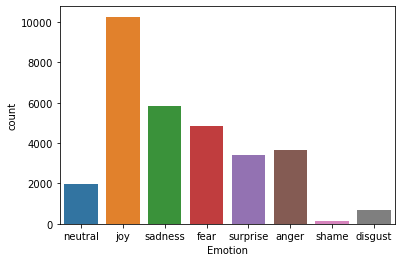

In [9]:
sns.countplot(x='Emotion',data=df)

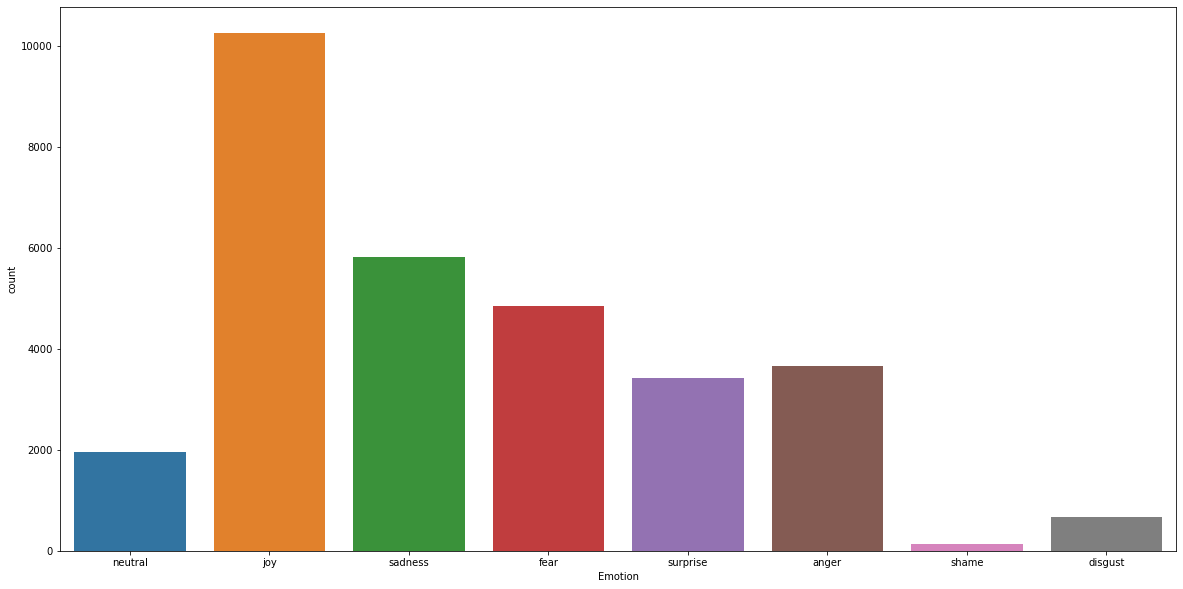

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        result="Positive"
    elif sentiment<0:
        result="Negative"
    else:
        result="Neutral"
    return result

In [13]:
get_sentiment("I Love coding")

'Positive'

In [14]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [15]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [16]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1612
          Neutral      1115
          Positive      932
disgust   Negative      250
          Neutral       197
          Positive      220
fear      Negative     1368
          Neutral      1636
          Positive     1854
joy       Negative     1498
          Neutral      3382
          Positive     5384
neutral   Negative      108
          Neutral      1406
          Positive      452
sadness   Negative     2355
          Neutral      1793
          Positive     1672
shame     Negative       43
          Neutral        48
          Positive       50
surprise  Negative      513
          Neutral      1348
          Positive     1569
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

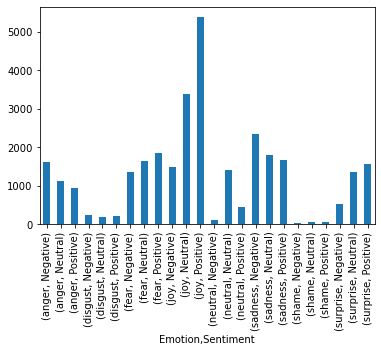

In [17]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\gayatri\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\gayatri\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


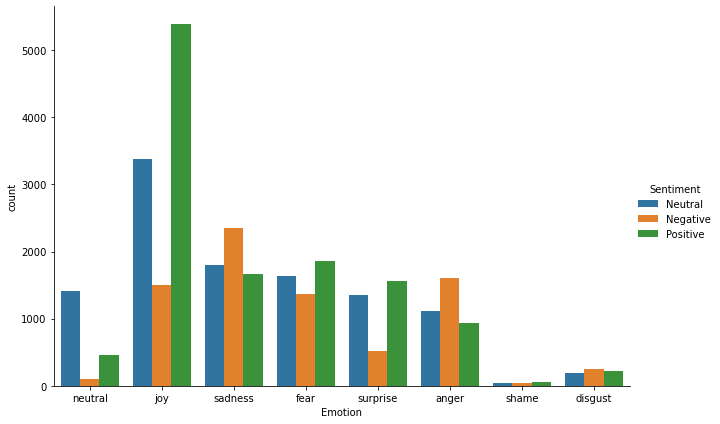

In [18]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

### Data pre-processing

In [19]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [20]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [22]:
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [23]:
df['Clean_Text']=df['Text'].apply(nfx.remove_punctuations)

In [24]:
df['Clean_Text']=df['Text'].apply(nfx.remove_emojis)

In [25]:
df['Clean_Text']=df['Text'].apply(nfx.remove_special_characters)

In [26]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade on my to do list for tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,Such an eye The true hazel eyeand so brillia...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,Iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...,...,...
30800,joy,When I understood that I was admitted to the U...,Neutral,When I understood that I was admitted to the U...
30801,joy,Tuesday woken up to Oscar and Cornet practice X,Neutral,Tuesday woken up to Oscar and Cornet practice X
30802,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,MichelGW have you gift Hope you like it Its ha...
30803,joy,The world didnt give it to me..so the world MO...,Positive,The world didnt give it to meso the world MOST...


In [27]:
from collections import Counter

In [28]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [29]:
emotion_list=df['Emotion'].unique().tolist()

In [30]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [31]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()
joy_docx=' '.join(joy_list)
keyword_joy=extract_keywords(joy_docx)

In [32]:
keyword_joy

{'the': 5044,
 'to': 4493,
 'I': 4100,
 'a': 3399,
 'and': 3081,
 'of': 2687,
 'my': 2608,
 'in': 2225,
 'for': 1907,
 'is': 1489,
 'with': 1312,
 'that': 1143,
 'you': 1118,
 'at': 1090,
 'was': 1073,
 'on': 1058,
 'me': 1047,
 'it': 916,
 'have': 905,
 'be': 844,
 'this': 753,
 'day': 706,
 'amp': 664,
 'up': 631,
 'all': 600,
 'had': 594,
 'time': 580,
 'so': 558,
 'Im': 503,
 'work': 499,
 'your': 498,
 'when': 489,
 'The': 486,
 'When': 480,
 'today': 463,
 'tomorrow': 461,
 'Christmas': 454,
 'an': 450,
 'not': 450,
 'get': 449,
 'like': 448,
 'from': 442,
 'love': 434,
 'now': 420,
 'about': 416,
 'just': 408,
 'out': 405,
 'are': 400,
 'happy': 374,
 'as': 365}

In [33]:
def plot_most_common_words(mydict,emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

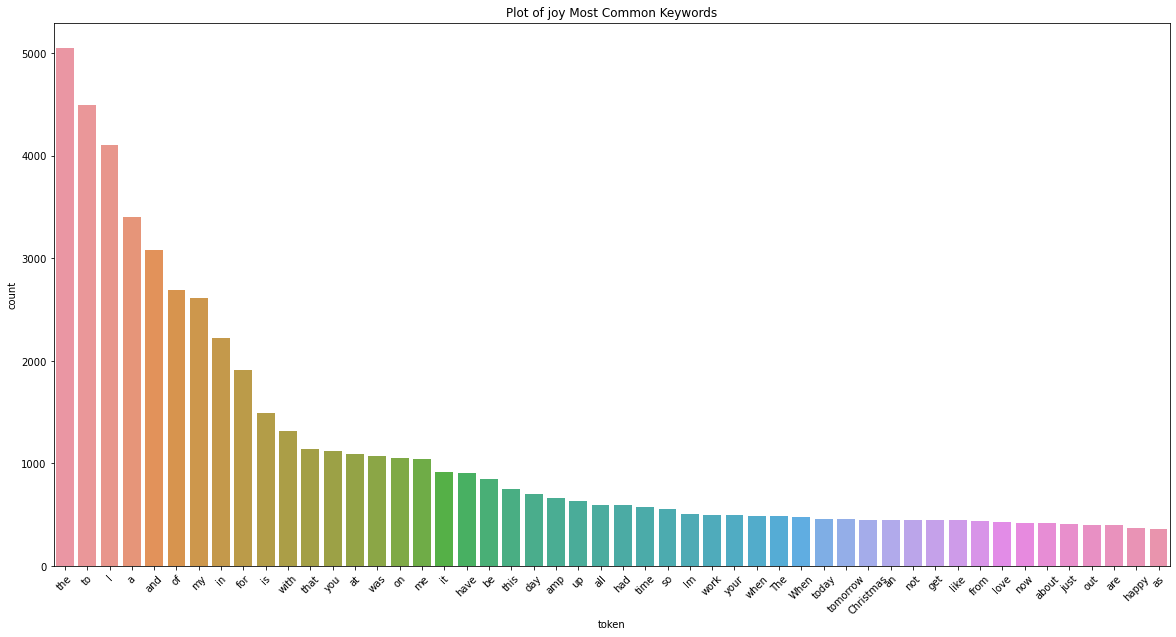

In [34]:
plot_most_common_words(keyword_joy,"joy")

In [35]:
from wordcloud import WordCloud

In [36]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

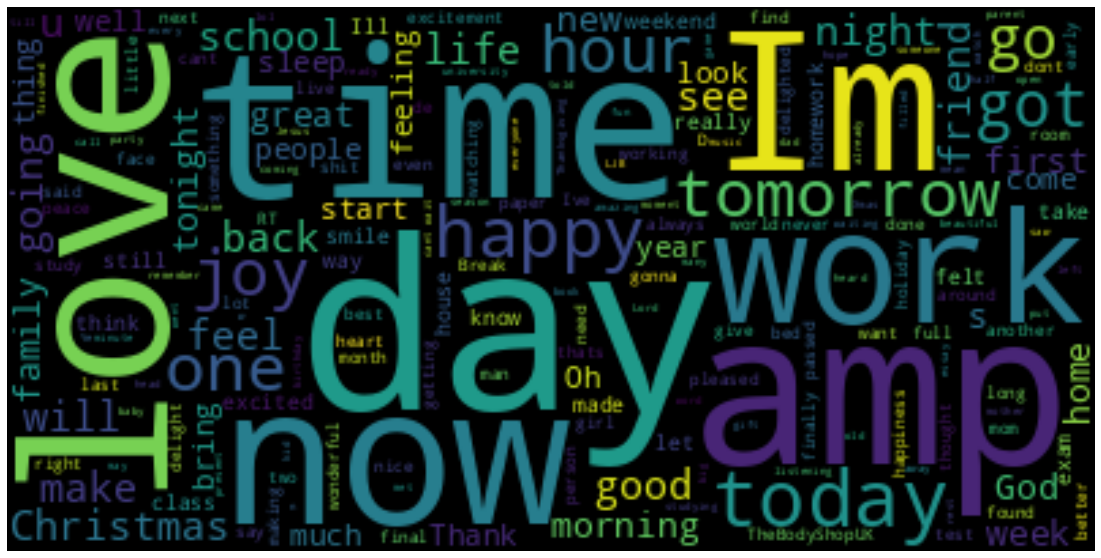

In [37]:
plot_wordcloud(joy_docx)

### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [38]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
from sklearn.metrics import accuracy_score

### Training the model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.6063622592512443

In [42]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.717377191084181

In [43]:
xfeatures=df['Clean_Text']
ylabels=df['Emotion']

In [44]:
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(xfeatures)

In [45]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)
nv_model.score(x_test,y_test)

0.6492101276779918

In [47]:
x = df['Clean_Text']
y = df['Emotion']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.7403159489288033

### Saving the model

In [48]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [49]:
import joblib

# Load the trained pipeline
loaded_pipeline = joblib.load("text_emotion.pkl")

# Function to predict emotion for a single text
def predict_emotion_with_scores(text):
    # Ensure the input text is a list (as required by the pipeline)
    text_list = [text]
    
    # Use the pipeline to get both predicted emotion and prediction scores
    predicted_result = loaded_pipeline.predict(text_list)[0]
    prediction_scores = loaded_pipeline.predict_proba(text_list)[0]
    
    return predicted_result, prediction_scores
# Function to predict emotion for a single text
def predict_emotion(text):
    # Ensure the input text is a list (as required by the pipeline)
    text_list = [text]
    
    # Use the pipeline to predict the emotion
    predicted_emotion = loaded_pipeline.predict(text_list)[0]
    
    return predicted_emotion

# Get text input from the user
user_input_text = input("Enter a text for emotion prediction: ")

# Call the prediction function
predicted_emotion, prediction_scores = predict_emotion_with_scores(user_input_text)

# Display the results
print(f"\nThe predicted emotion for the text is: {predicted_emotion}")
print("\nPrediction Scores:")
for emotion, score in zip(loaded_pipeline.classes_, prediction_scores):
    print(f"{emotion}: {score:.4f}")


Enter a text for emotion prediction:  The cinematography is hauntingly beautiful, with each frame carefully composed to amplify the feeling of impending doom. The play of shadows and eerie lighting choices enhance the unsettling ambiance, making every creaking floorboard and distant murmur a cause for genuine apprehension.

The predicted emotion for the text is: fear

Prediction Scores:
anger: 0.0019
disgust: 0.0156
fear: 0.5203
joy: 0.4547
neutral: 0.0000
sadness: 0.0046
shame: 0.0020
surprise: 0.0009


In [50]:
df['Predicted_Emotion'] = df['Clean_Text'].apply(predict_emotion)

# Print the DataFrame with relevant columns
print(df[['Emotion', 'Text', 'Predicted_Emotion']])

        Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
30800       joy  When I understood that I was admitted to the U...   
30801       joy    Tuesday woken up to Oscar and Cornet practice X   
30802  surprise  @MichelGW have you gift! Hope you like it! It'...   
30803       joy  The world didnt give it to me..so the world MO...   
30804      fear  Youu call it JEALOUSY, I call it of #Losing YO...   

      Predicted_Emotion  
0               neutral  
1                   joy  
2               sadness  
3                   joy  
4                   joy  
...

In [51]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

In [52]:
# Print the classification report
print("Classification Report:")
print(classification_report(df['Emotion'], df['Predicted_Emotion']))

Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.93      0.95      3659
     disgust       0.97      0.86      0.91       667
        fear       0.97      0.96      0.96      4858
         joy       0.94      0.97      0.96     10264
     neutral       0.92      0.97      0.94      1966
     sadness       0.95      0.94      0.94      5820
       shame       0.99      0.97      0.98       141
    surprise       0.96      0.90      0.93      3430

    accuracy                           0.95     30805
   macro avg       0.96      0.94      0.95     30805
weighted avg       0.95      0.95      0.95     30805



In [53]:
# Print the confusion matrix
conf_matrix = confusion_matrix(df['Emotion'], df['Predicted_Emotion'])
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 3410     5    41    81    28    75     1    18]
 [   15   573     7    34     4    26     0     8]
 [   30     3  4641    96    19    47     0    22]
 [   20     3    37 10006    50    93     0    55]
 [    5     0     2    40  1901    15     0     3]
 [   42     3    50   203    41  5445     0    36]
 [    3     0     1     0     0     0   137     0]
 [   25     2    27   221    17    56     0  3082]]


C:\Users\gayatri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


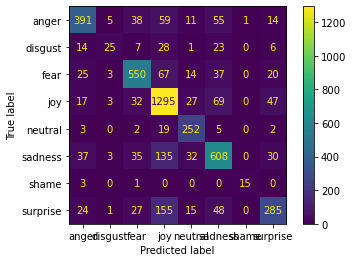

In [54]:
plot_confusion_matrix(pipe_lr,x_test,y_test)

# Text Extraction from image

In [55]:
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable (change this to your Tesseract installation path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_english_text_from_image(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Use Tesseract to do OCR with English language
    text = pytesseract.image_to_string(image, lang='eng')

    return text

# Example usage
image_path = r'C:\Users\gayatri\Documents\Downloads\download.jfif'  # Replace with the path to your image file
extracted_english_text = extract_english_text_from_image(image_path)

print("Extracted English Text:")
print(extracted_english_text)

Extracted English Text:
“Trying to be happy by accumulating
possessions is like trying to satisfy

hunger by taping sandwiches all
over your body.”
- George Carlin




In [56]:
predicted_image_result=predict_emotion(extracted_english_text)
print(f"The predicted emotion for the text is: {predicted_image_result}")

The predicted emotion for the text is: joy


In [57]:
from PIL import Image
import pytesseract

# Set the path to the Tesseract executable (change this to your Tesseract installation path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_telugu_text_from_image(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Use Tesseract to do OCR with Telugu language
    text = pytesseract.image_to_string(image, lang='tel')

    return text

# Example usage
image_path = r'C:\Users\gayatri\Documents\Downloads\t4.png'
extracted_telugu_text = extract_telugu_text_from_image(image_path)

print("Extracted Telugu Text:")
print(extracted_telugu_text)


Extracted Telugu Text:
ఈరోజును!
ఒకరిపట్ల
నిర్లక్ష్యం

రేపు ఇంకొకరి నుండి.
అన్పభవిస్తే అర్థం అవుతుంది
ఎంత బాధగఉంటుందో




In [58]:
pip install googletrans==4.0.0-rc1


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from googletrans import Translator

def translate_telugu_to_english(text):
    translator = Translator()
    translated_text = translator.translate(text, src='te', dest='en').text
    return translated_text

# Example usage
telugu_text = extracted_telugu_text
english_translation = translate_telugu_to_english(telugu_text)

print(f"Telugu Text:\n {telugu_text}")
print(f"English Translation:\n {english_translation}")

predicted_timage_result=predict_emotion(english_translation)
print(f"\nThe predicted emotion for the text is: {predicted_timage_result}")

Telugu Text:
 ఈరోజును!
ఒకరిపట్ల
నిర్లక్ష్యం

రేపు ఇంకొకరి నుండి.
అన్పభవిస్తే అర్థం అవుతుంది
ఎంత బాధగఉంటుందో


English Translation:
 Today!
One with each other
Negligence

From someone else tomorrow.
It is understandable
How sad

The predicted emotion for the text is: sadness
